/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


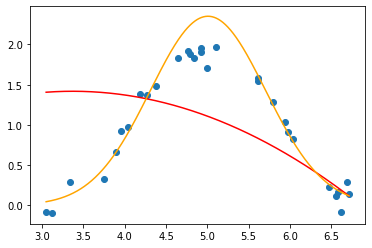

In [29]:
import numpy as np
import matplotlib.pyplot as plt


def model_A(x, params):
    y = params[0]+x*params[1]+params[2]*x**2.
    return y

def model_B(x, params):
    y = params[0]*(np.exp(-0.5*(x-params[1])**2./params[2]**2.))
    return y

def loglike(x_obs, y_obs, sigma_y_obs, betas,model):
    n_obs = len(y_obs)
    l = 0.0
    for i in range(n_obs):
        l += -0.5*(y_obs[i]-model(x_obs[i], betas))**2/sigma_y_obs[i]**2
    return l




def run_mcmc(x_obs,y_obs, n_dim, n_iterations, sigma_y_obs,model):
    
    

    betas = np.zeros([n_iterations, n_dim+1])
    for i in range(1, n_iterations):
        current_betas = betas[i-1,:]
        next_betas = current_betas + np.random.normal(scale=0.1, size=n_dim+1)

        loglike_current = loglike(x_obs, y_obs, sigma_y_obs, current_betas,model)
        loglike_next = loglike(x_obs, y_obs, sigma_y_obs, next_betas,model)

        r = np.min([np.exp(loglike_next - loglike_current), 1.0])
        alpha = np.random.random()

        if alpha < r:
            betas[i,:] = next_betas
        else:
            betas[i,:] = current_betas
    betas = betas[n_iterations//2:,:]
    return {'betas':betas, 'x_obs':x_obs, 'y_obs':y_obs}

data = np.loadtxt("data_to_fit.txt")
x_obs = data[:,0]
y_obs = data[:,1]
sigma= data[:,2]


results_A = run_mcmc(x_obs,y_obs,2,2000,sigma,model_A)
results_B = run_mcmc(x_obs,y_obs,2,2000,sigma,model_B)
betas_A = results_A['betas']
betas_B = results_B['betas']

xf=np.linspace(np.amin(x_obs),np.amax(x_obs),1000)
plt.figure()

plt.scatter(x_obs,y_obs)
plt.plot(xf,model_A(xf,betas_A[-1,:]),c="r")
plt.plot(xf,model_B(xf,betas_B[-1,:]),c="orange")
plt.savefig("ajuste_bayes_mcmc.png",  bbox_inches='tight')    